In [2]:
import sys
sys.path.append('/n/home09/kboone/CompressedFisher/')

from getdist import plots, MCSamples
import matplotlib.pyplot as plt
from Bin_Helpers import *
import CompressedFisher
import numpy as np

import matplotlib
matplotlib.style.use('des_dr1')

In [50]:
all_pivots = []
for ind in np.arange(1000):
    pivots = np.load('Splits_Data/Cross/WPH_100_Planck_x_dr3.npy')[ind]
    all_pivots.append(pivots[:,1])
all_pivots=np.array(all_pivots)

In [56]:
ave_pivots = np.append(np.append([0], np.average(all_pivots, axis=0)), [14])
importance = ave_pivots[1:] - ave_pivots[:-1]

In [57]:
importance

array([1.65626785, 1.95676901, 0.57668459, 0.13912096, 0.18171722,
       0.21040574, 0.48503728, 2.77379733, 1.32107078, 0.22734992,
       0.10341687, 0.14052839, 0.22502882, 0.35375344, 0.30979074,
       0.2371402 , 0.18255353, 0.29216235, 0.41661783, 0.39992424,
       0.63273287, 0.30346712, 0.31580373, 0.55885917])

In [37]:
pivots_ind[0]

array([7.32519463])

In [18]:
%matplotlib inline

In [19]:
Om = 0.3175
s8 = 0.834
deriv_params = ['Om', 's8']

In [20]:
surveys = ['ACT', 'Planck', 'SPT', 'SO']

Cls = []
wst = []
Cls_50 = []
wst_50 = []
Cls_orig = []
wst_orig = []

Cls_covs = []
wst_covs = []
Cls_50_covs = []
wst_50_covs = []
Cls_orig_covs = []
wst_orig_covs = []

for s in surveys:
    
    covs = np.load('Splits_Data/CMBL/Cl_100_'+s+'_contours.npy')
    cov = np.average(covs, axis=0)
    Cls.append(get_chain(cov)[0])
    Cls_covs.append(cov)
    
    covs = np.load('Splits_Data/CMBL/Cl_50_'+s+'_contours.npy')
    cov = np.average(covs, axis=0)
    Cls_50.append(get_chain(cov)[0])
    Cls_50_covs.append(cov)
    
    covs = np.load('Splits_Data/CMBL/Cl_100_'+s+'_orig_contours.npy')
    cov = np.average(covs, axis=0)
    Cls_orig.append(get_chain(cov)[0])
    Cls_orig_covs.append(cov)
    
    covs = np.load('Splits_Data/CMBL/WST_100_'+s+'_contours.npy')
    cov = np.average(covs, axis=0)
    wst.append(get_chain(cov)[0])
    wst_covs.append(cov)
    
    covs = np.load('Splits_Data/CMBL/WST_50_'+s+'_contours.npy')
    cov = np.average(covs, axis=0)
    wst_50.append(get_chain(cov)[0])
    wst_50_covs.append(cov)
    
    covs = np.load('Splits_Data/CMBL/WST_100_'+s+'_orig_contours.npy')
    cov = np.average(covs, axis=0)
    wst_orig.append(get_chain(cov)[0])
    wst_orig_covs.append(cov)
    
Cls_covs = np.array(Cls_covs)
wst_covs = np.array(wst_covs)
Cls_50_covs = np.array(Cls_50_covs)
wst_50_covs = np.array(wst_50_covs)
Cls_orig_covs = np.array(Cls_orig_covs)
wst_orig_covs = np.array(wst_orig_covs)

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


In [44]:
ind = 1
surveys[ind]

'Planck'

In [45]:
np.sqrt(Cls_covs[ind][0,0] / wst_covs[ind][0,0])

1.312692142926807

In [46]:
np.sqrt(Cls_covs[ind][1,1] / wst_covs[ind][1,1])

1.712057896311074

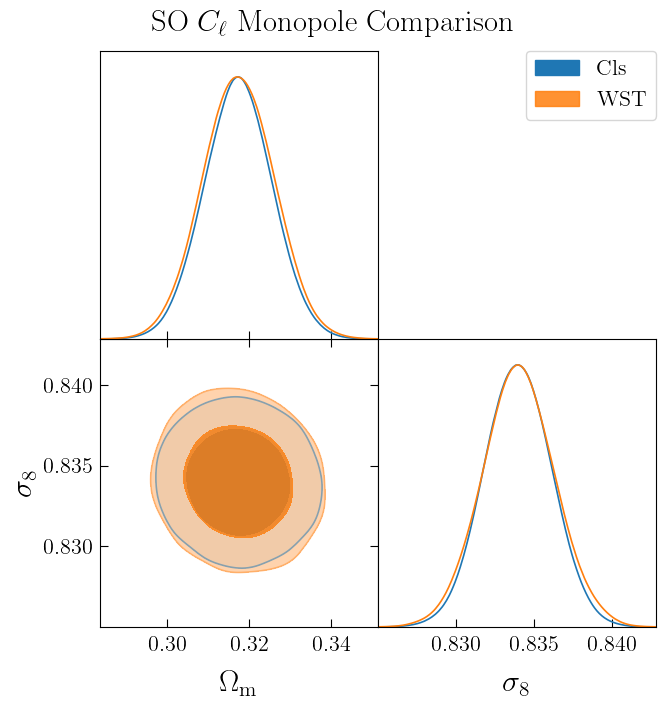

In [33]:
ind = 3
g = plots.getSubplotPlotter(width_inch=7)

g.settings.axes_fontsize = 16     # tick number font size
g.settings.axes_labelsize = 22    # axis label font size (Om, sigma8)
g.settings.legend_fontsize = 13   # legend text
g.settings.linewidth = 2.0        # (optional) thicker contour lines

cmap = plt.get_cmap("tab10")
g.triangle_plot([Cls[ind]] + [wst[ind]],
                ['Om','sigma8'],filled=True,  contour_lws=1.2, 
                legend_labels=['Cls', 'WST'],
                legend_loc='upper right', colors = [cmap(0), cmap(1)],
                contour_ls = '-', contour_colors = [cmap(0), cmap(1)], 
                param_limits={'~Om': [Om-0.15,Om+0.15], '~sigma8': [s8-0.05,s8+0.05]})
g.fig.suptitle(surveys[ind]+r' $C_\ell$ Monopole Comparison', y = 1.02, fontsize=20)

plt.show()

In [29]:
np.sqrt(wst_covs[3][1,1])

0.002181062697469044

In [ ]:
np.sqrt(Cls_covs[0][0,0])

In [22]:
np.sqrt(wst_50_covs[0][0,0] / wst_covs[0][0,0])

1.1917268332396567

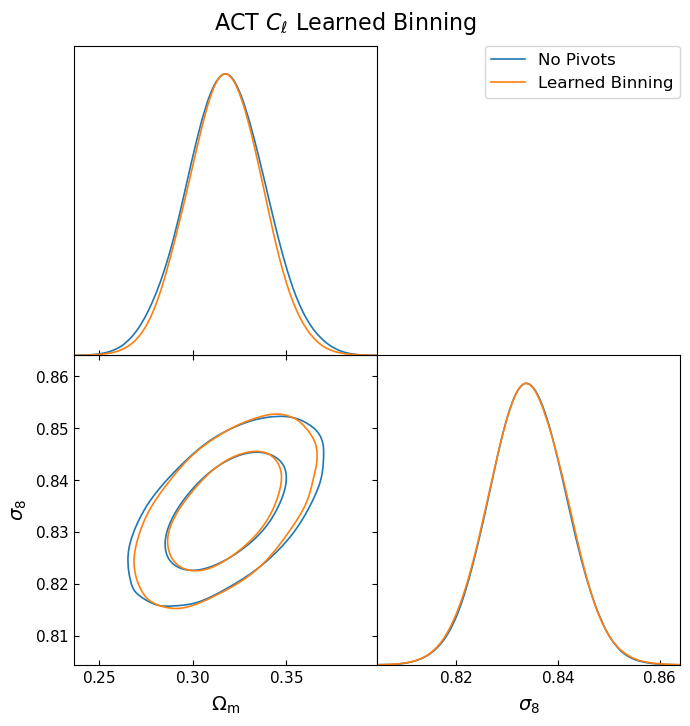

In [12]:
ind = 0
g = plots.getSubplotPlotter(width_inch=7)
cmap = plt.get_cmap("tab10")
g.triangle_plot([Cls_orig[ind]] + [Cls[ind]],
                ['Om','sigma8'],filled=False,  contour_lws=1.2, 
                legend_labels=['No Pivots', 'Learned Binning'],
                legend_loc='upper right', colors = [cmap(0), cmap(1), cmap(2)],
                contour_ls = '-', contour_colors = [cmap(0), cmap(1), cmap(2)], 
                param_limits={'~Om': [Om-0.15,Om+0.15], '~sigma8': [s8-0.05,s8+0.05]})
g.fig.suptitle(surveys[ind]+r' $C_\ell$ Learned Binning', y = 1.03, fontsize=16)
plt.show()

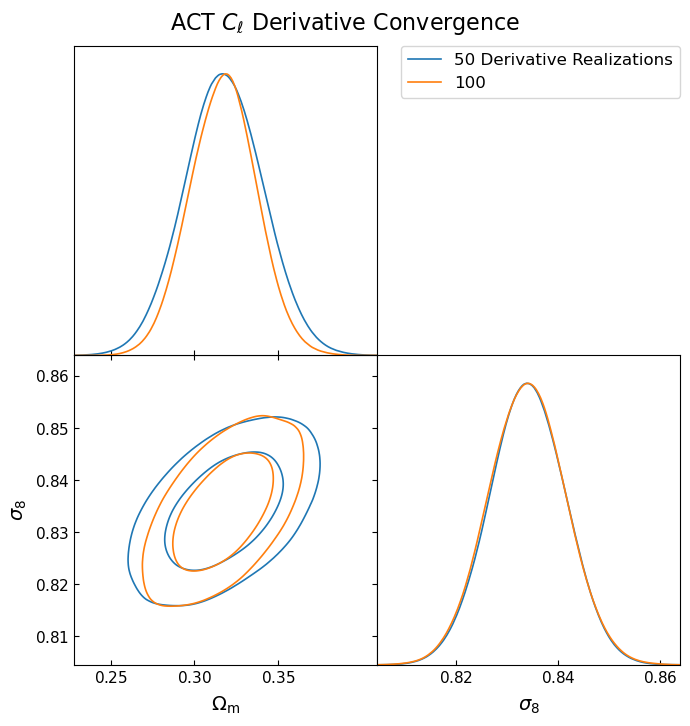

In [17]:
ind = 0
g = plots.getSubplotPlotter(width_inch=7)
cmap = plt.get_cmap("tab10")
g.triangle_plot([Cls_50[ind]] + [Cls[ind]],
                ['Om','sigma8'],filled=False,  contour_lws=1.2, 
                legend_labels=['50 Derivative Realizations', '100'],
                legend_loc='upper right', colors = [cmap(0), cmap(1), cmap(2)],
                contour_ls = '-', contour_colors = [cmap(0), cmap(1), cmap(2)], 
                param_limits={'~Om': [Om-0.15,Om+0.15], '~sigma8': [s8-0.05,s8+0.05]})
g.fig.suptitle(surveys[ind]+r' $C_\ell$ Derivative Convergence', y = 1.03, fontsize=16)
plt.show()
# g.fig.savefig('../Dimension_Reduction/Paper_Plots/'+surveys[ind]+'_CLS_Conv.pdf', format='pdf', bbox_inches='tight',  # include everything that sticks out
#               pad_inches=0.02)
# plt.close()

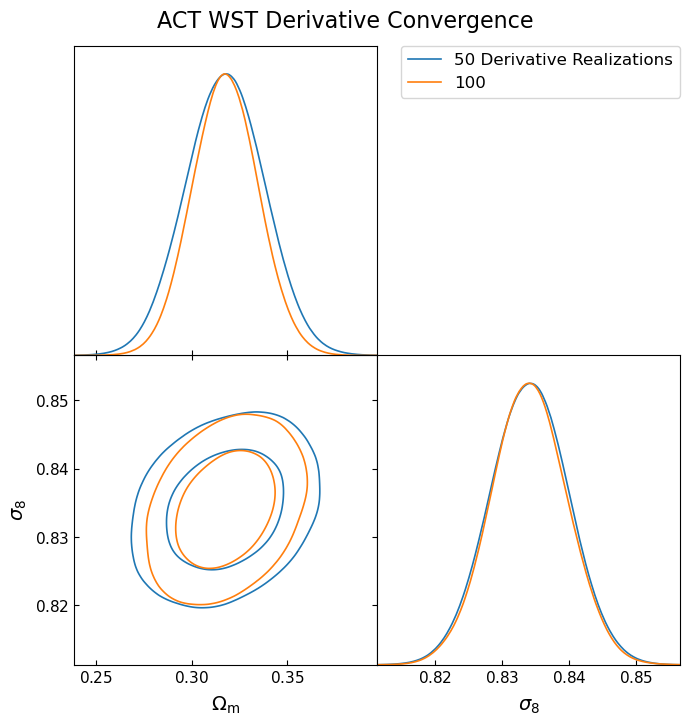

In [16]:
ind = 0
g = plots.getSubplotPlotter(width_inch=7)
cmap = plt.get_cmap("tab10")
g.triangle_plot([wst_50[ind]] + [wst[ind]],
                ['Om','sigma8'],filled=False,  contour_lws=1.2, 
                legend_labels=['50 Derivative Realizations', '100'],
                legend_loc='upper right', colors = [cmap(0), cmap(1)],
                contour_ls = '-', contour_colors = [cmap(0), cmap(1)], 
                param_limits={'~Om': [Om-0.15,Om+0.15], '~sigma8': [s8-0.05,s8+0.05]})
g.fig.suptitle(surveys[ind]+' WST Derivative Convergence', y = 1.03, fontsize=16)
plt.show()
# g.fig.savefig('../Dimension_Reduction/Paper_Plots/'+surveys[ind]+'_WST_Conv.pdf', format='pdf', bbox_inches='tight',  # include everything that sticks out
#               pad_inches=0.02)
# plt.close()

In [15]:
np.sqrt(Cls_covs[1][0,0] / wst_covs[1][0,0])

1.1754009232766849

In [21]:
g = plots.getSubplotPlotter(width_inch=7)

g.settings.axes_fontsize = 16     # tick number font size
g.settings.axes_labelsize = 22    # axis label font size (Om, sigma8)
g.settings.legend_fontsize = 18   # legend text
g.settings.linewidth = 2.0        # (optional) thicker contour lines

cmap = plt.get_cmap("tab10")
g.triangle_plot(Cls,
                ['Om','sigma8'],filled=True,  contour_lws=1.2, 
                legend_labels=surveys, #legend_labels=[r'Cross $C_\ell$', 'WPH'],
                legend_loc='upper right', colors = [cmap(0), cmap(1), cmap(2), cmap(3)],
                contour_ls = '-', contour_colors = [cmap(0), cmap(1), cmap(2), cmap(3)], 
                param_limits={'~Om': [Om-0.15,Om+0.15], '~sigma8': [s8-0.05,s8+0.05]})
g.fig.suptitle(r'$C_\ell$ Constraints', y = 1.02, fontsize=20)
g.fig.savefig('../Paper_Plots/All_CLS.pdf', format='pdf', bbox_inches='tight',  # include everything that sticks out
              pad_inches=0.02)
plt.close()
# plt.show()

In [22]:
g = plots.getSubplotPlotter(width_inch=7)

g.settings.axes_fontsize = 16     # tick number font size
g.settings.axes_labelsize = 22    # axis label font size (Om, sigma8)
g.settings.legend_fontsize = 18   # legend text
g.settings.linewidth = 2.0        # (optional) thicker contour lines

cmap = plt.get_cmap("tab10")
g.triangle_plot(wst,
                ['Om','sigma8'],filled=True,  contour_lws=1.2, 
                legend_labels=surveys, #legend_labels=[r'Cross $C_\ell$', 'WPH'],
                legend_loc='upper right', colors = [cmap(0), cmap(1), cmap(2), cmap(3)],
                contour_ls = '-', contour_colors = [cmap(0), cmap(1), cmap(2), cmap(3)], 
                param_limits={'~Om': [Om-0.15,Om+0.15], '~sigma8': [s8-0.05,s8+0.05]})
g.fig.suptitle(r'WST Constraints', y = 1.02, fontsize=20)
g.fig.savefig('../Paper_Plots/All_WST.pdf', format='pdf', bbox_inches='tight',  # include everything that sticks out
              pad_inches=0.02)
plt.close()

In [26]:
ind = 3
g = plots.getSubplotPlotter(width_inch=7)

g.settings.axes_fontsize = 16     # tick number font size
g.settings.axes_labelsize = 22    # axis label font size (Om, sigma8)
g.settings.legend_fontsize = 18   # legend text
g.settings.linewidth = 2.0        # (optional) thicker contour lines

cmap = plt.get_cmap("tab10")
g.triangle_plot([Cls[ind]] + [wst[ind]],
                ['Om','sigma8'],filled=True,  contour_lws=1.2, 
                legend_labels=[r'$C_\ell$', 'WST'],
                legend_loc='upper right', colors = [cmap(0), cmap(1)],
                contour_ls = '-', contour_colors = [cmap(0), cmap(1)], 
                param_limits={'~Om': [Om-0.15,Om+0.15], '~sigma8': [s8-0.05,s8+0.05]})
g.fig.suptitle(surveys[ind]+' Statistic Comparison', y = 1.02, fontsize=20)
g.fig.savefig('../Paper_Plots/'+surveys[ind]+'.pdf', format='pdf', bbox_inches='tight',  # include everything that sticks out
              pad_inches=0.02)
plt.close()